In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

In [2]:
np.random.seed(42)

X_10 = 10 * np.random.rand(10)
Y_10 = X_10**2 + np.random.normal(0, 1, 10)

df_10 = pd.DataFrame({'x': X_10, 'y': Y_10})
df_10

,x,y
0,3.745401,13.558556
1,9.507143,90.928329
2,7.319939,53.118095
3,5.986585,35.373468
4,1.560186,2.676144
5,1.559945,0.520149
6,0.580836,-1.387547
7,8.661761,74.463824
8,6.011150,35.121095
9,7.080726,50.450925


In [3]:
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=9)),
    ('linear_regression', LinearRegression())
])

pipeline.fit(df_10[['x']], df_10[['y']])

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=9)),
                ('linear_regression', LinearRegression())])

In [4]:
y_10_pred = pipeline.predict(df_10[['x']])
mse = mean_squared_error(Y_10, y_10_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.0000


In [5]:
X_100 = 10 * np.random.rand(100)
Y_100 = X_100**2 + 0.1 * np.random.randn(100)
df_100 = pd.DataFrame({'x': X_100, 'y': Y_100})
df_100

,x,y
0,2.921446,8.464644
1,3.663618,13.389334
2,4.560700,20.760772
3,7.851760,61.503778
4,1.996738,4.016574
...,...,...
95,1.865701,3.473556
96,8.925590,79.581477
97,5.393422,28.937521
98,8.074402,65.151309


In [6]:
y_100_pred = pipeline.predict(df_100[['x']])
mse = mean_squared_error(Y_100, y_100_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 38924168.5331


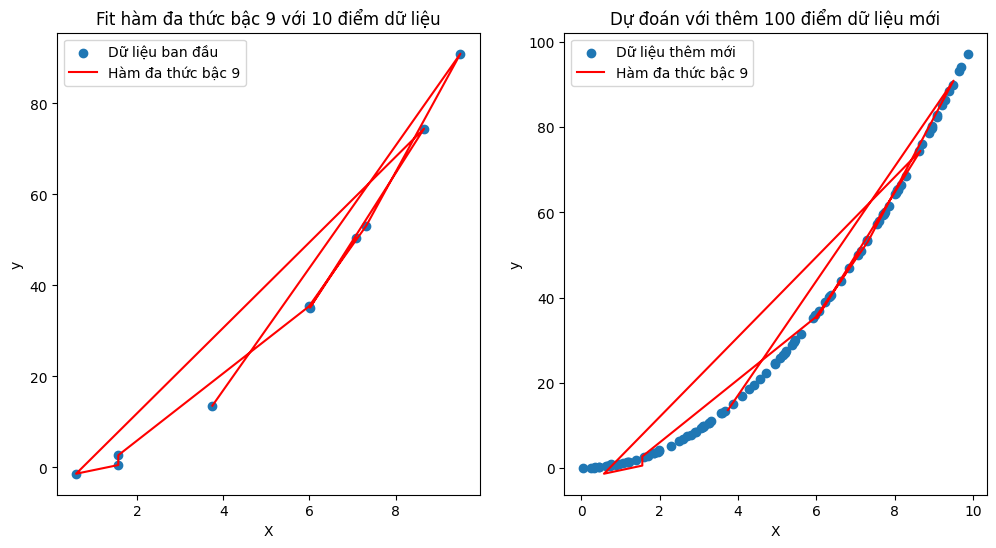

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_10, Y_10, label="Dữ liệu ban đầu")
plt.plot(X_10, y_10_pred, color='red', label="Hàm đa thức bậc 9")
plt.title("Fit hàm đa thức bậc 9 với 10 điểm dữ liệu")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_100, Y_100, label="Dữ liệu thêm mới")
plt.plot(X_10, y_10_pred, color='red', label="Hàm đa thức bậc 9")
plt.title("Dự đoán với thêm 100 điểm dữ liệu mới")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.show()

In [8]:
image = np.array([ [1, 2, 3, 4, 5],
                    [6, 7, 8, 9, 10],
                    [11, 12, 13, 14, 15],
                    [16, 17, 18, 19, 20],
                    [21, 22, 23, 24, 25]], dtype=np.float32)

kernel = np.array([ [1.0, 0.0, 1.0],
                    [0.0, 1.0, 0.0],
                    [1.0, 0.0, 1.0]], dtype=np.float32)

In [10]:
def convolution_2d(image, kernel, padding=0, stride=(1, 1)):
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Extract the stride values for height and width
    stride_height, stride_width = stride[0], stride[1]

    # Calculate the output dimensions with padding and stride
    output_height = (image_height - kernel_height + 2 * padding) // stride_height + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride_width + 1

    # Initialize new empty output matrix
    output = np.zeros((output_height, output_width))

    # Apply padding by creating a larger image
    padded_image = np.zeros((image_height + 2 * padding, image_width + 2 * padding))
    padded_image[padding : image_height + padding, padding : image_width + padding] = image

    # Calculate the output matrix
    for i in range(0, output_height):
        for j in range(0, output_width):
            output[i, j] = np.sum(padded_image[i * stride_height : i * stride_height + kernel_height,
                                               j * stride_width  : j * stride_width  + kernel_width]
                                                * kernel)

    return output

result = convolution_2d(image, kernel, padding=0, stride= (1, 1))

# Print the result
print("Original Image:")
print(image)
print("Kernel:")
print(kernel)
print("Convolution Result:")
print(result)


Original Image:
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]
Kernel:
[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]]
Convolution Result:
[[35. 40. 45.]
 [60. 65. 70.]
 [85. 90. 95.]]


In [11]:
image_tensor = torch.tensor(image).unsqueeze(0).unsqueeze(0) # Add batch and channel dimensions
kernel_tensor = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

# Create a convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=0, bias=False)

# Set the weights of the convolutional layer to the kernel
conv_layer.weight.data = kernel_tensor

# Perform convolution
output = conv_layer(image_tensor)

# Convert the output tensor to a numpy array for visualization
output_array = output.squeeze(0).squeeze(0).detach().numpy()

# Print the result
print("Original Image:")
print(image)
print("Kernel:")
print(kernel)
print("Convolution Result:")
print(output_array)


Original Image:
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]
Kernel:
[[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]]
Convolution Result:
[[35. 40. 45.]
 [60. 65. 70.]
 [85. 90. 95.]]


In [12]:
num_classes = 10
num_epochs = 20
batch_size = 64

In [13]:
# Define data transformations (optional but recommended)
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the data
])

# Download and load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 43377240.34it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [14]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Use random_split to split the dataset
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for the training and validation sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [15]:
class VGG16(nn.Module):
    def __init__(self, in_channels = 3, num_classes= 10):
        super(VGG16, self).__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels= 3, out_channels= 64, kernel_size= (3,3), stride= (1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 64, out_channels= 64, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= (2,2), stride= (2,2)))

        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels= 64, out_channels= 128, kernel_size= (3,3), stride= (1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 128, out_channels= 128, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= (2,2), stride= (2,2)))

        self.block_3 = nn.Sequential(
            nn.Conv2d(in_channels= 128, out_channels= 256, kernel_size= (3,3), stride= (1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 256, out_channels= 256, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= (2,2), stride= (2,2)))

        self.block_4 = nn.Sequential(
            nn.Conv2d(in_channels= 256, out_channels= 512, kernel_size= (3,3), stride= (1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= (2,2), stride= (2,2)))

        self.block_5 = nn.Sequential(
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= (3,3), stride= (1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= 512, out_channels= 512, kernel_size= (3,3), stride=(1,1), padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= (2,2), stride= (2,2)))

        self.fcs = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p= 0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p= 0.5),
            nn.Linear(4096, num_classes))

        self.avgpool = torch.nn.AdaptiveAvgPool2d((7, 7))

    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

In [16]:
model = VGG16(in_channels = 3, num_classes = 10)
x = torch.randn(1, 3, 224, 224)
print(model(x).shape)

torch.Size([1, 10])


In [17]:
# Learning rate
learning_rate = 0.001

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = VGG16(in_channels = 3, num_classes = num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        current_loss += loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

    epoch_loss_list.append(current_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] Total train Cost: {current_loss}')
    print("-" * 45)

Epoch [1/20], Batch [100/625], Loss: 2.3047
Epoch [1/20], Batch [200/625], Loss: 2.3004
Epoch [1/20], Batch [300/625], Loss: 2.3017
Epoch [1/20], Batch [400/625], Loss: 2.3019
Epoch [1/20], Batch [500/625], Loss: 2.3013
Epoch [1/20], Batch [600/625], Loss: 2.3026
Epoch [1/20] Total train Cost: 1439.1838991641998
---------------------------------------------
Epoch [2/20], Batch [100/625], Loss: 2.3014
Epoch [2/20], Batch [200/625], Loss: 2.3028
Epoch [2/20], Batch [300/625], Loss: 2.3030
Epoch [2/20], Batch [400/625], Loss: 2.3020
Epoch [2/20], Batch [500/625], Loss: 2.3004
Epoch [2/20], Batch [600/625], Loss: 2.3010
Epoch [2/20] Total train Cost: 1439.1535658836365
---------------------------------------------
Epoch [3/20], Batch [100/625], Loss: 2.3016
Epoch [3/20], Batch [200/625], Loss: 2.3018
Epoch [3/20], Batch [300/625], Loss: 2.3037
Epoch [3/20], Batch [400/625], Loss: 2.3032
Epoch [3/20], Batch [500/625], Loss: 2.3026
Epoch [3/20], Batch [600/625], Loss: 2.3019
Epoch [3/20] Tot

Text(0.5, 1.0, 'Epoch Loss')

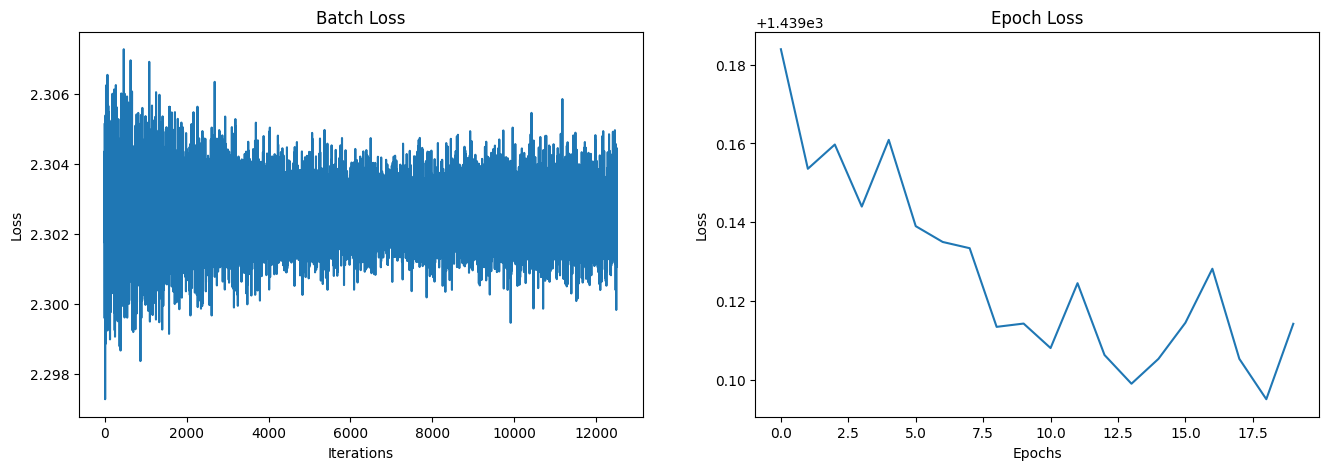

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(len(batch_loss_list)), (batch_loss_list), label='Batch Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].set_title('Batch Loss')

ax[1].plot(range(len(epoch_loss_list)), (epoch_loss_list), label='Epoch Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Epoch Loss')

In [23]:
# Learning rate
learning_rate = 0.001

In [24]:
model = VGG16(in_channels = 3, num_classes = num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        current_loss += loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

    epoch_loss_list.append(current_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] Total train Cost: {current_loss}')
    print("-" * 45)

Epoch [1/20], Batch [100/625], Loss: 2.3039
Epoch [1/20], Batch [200/625], Loss: 2.3026
Epoch [1/20], Batch [300/625], Loss: 2.3020
Epoch [1/20], Batch [400/625], Loss: 2.3024
Epoch [1/20], Batch [500/625], Loss: 2.3036
Epoch [1/20], Batch [600/625], Loss: 2.3032
Epoch [1/20] Total train Cost: 1439.1370663642883
---------------------------------------------
Epoch [2/20], Batch [100/625], Loss: 2.3038
Epoch [2/20], Batch [200/625], Loss: 2.3019
Epoch [2/20], Batch [300/625], Loss: 2.3041
Epoch [2/20], Batch [400/625], Loss: 2.3033
Epoch [2/20], Batch [500/625], Loss: 2.3019
Epoch [2/20], Batch [600/625], Loss: 2.3029
Epoch [2/20] Total train Cost: 1439.1461675167084
---------------------------------------------
Epoch [3/20], Batch [100/625], Loss: 2.3032
Epoch [3/20], Batch [200/625], Loss: 2.3026
Epoch [3/20], Batch [300/625], Loss: 2.3027
Epoch [3/20], Batch [400/625], Loss: 2.3032
Epoch [3/20], Batch [500/625], Loss: 2.3034
Epoch [3/20], Batch [600/625], Loss: 2.3029
Epoch [3/20] Tot

Text(0.5, 1.0, 'Epoch Loss')

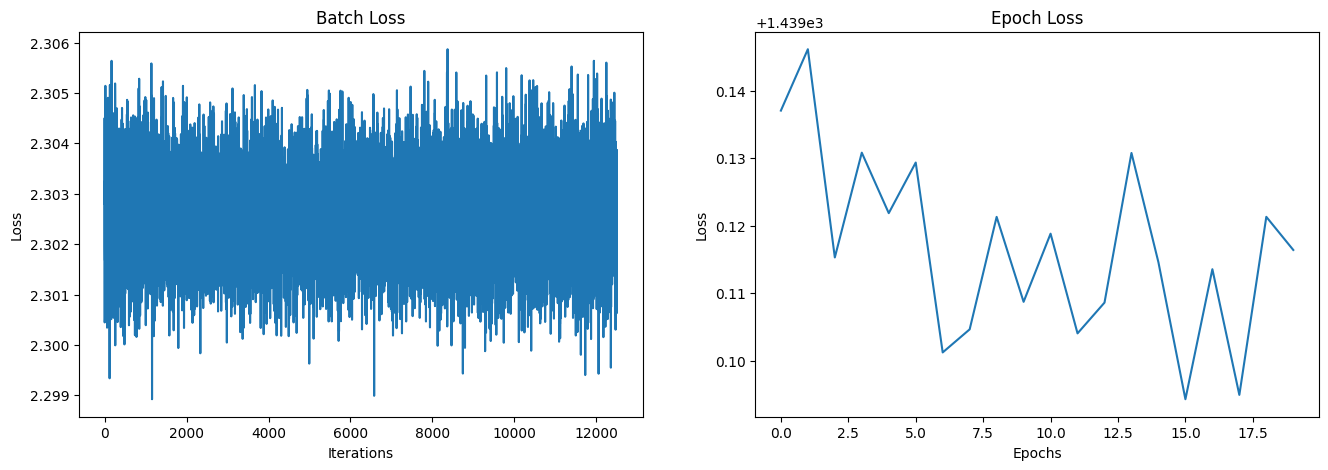

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(len(batch_loss_list)), (batch_loss_list), label='Batch Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].set_title('Batch Loss')

ax[1].plot(range(len(epoch_loss_list)), (epoch_loss_list), label='Epoch Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Epoch Loss')

In [20]:
# Learning rate
learning_rate = 0.1

In [21]:
model = VGG16(in_channels = 3, num_classes = num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
n_total_batches = len(train_loader)

batch_loss_list = []
epoch_loss_list = []

for epoch in range(num_epochs):
    model.train()
    current_loss = 0.
    for i, (images, labels) in enumerate(train_loader):

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_loss_list.append(loss.item())
        current_loss += loss.item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{n_total_batches}], Loss: {loss.item():.4f}')

    epoch_loss_list.append(current_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}] Total train Cost: {current_loss}')
    print("-" * 45)

Epoch [1/20], Batch [100/625], Loss: 2.2984
Epoch [1/20], Batch [200/625], Loss: 2.3031
Epoch [1/20], Batch [300/625], Loss: 2.3006
Epoch [1/20], Batch [400/625], Loss: 2.3013
Epoch [1/20], Batch [500/625], Loss: 2.3025
Epoch [1/20], Batch [600/625], Loss: 2.3097
Epoch [1/20] Total train Cost: 1439.4886305332184
---------------------------------------------
Epoch [2/20], Batch [100/625], Loss: 2.3001
Epoch [2/20], Batch [200/625], Loss: 2.3054
Epoch [2/20], Batch [300/625], Loss: 2.3055
Epoch [2/20], Batch [400/625], Loss: 2.2988
Epoch [2/20], Batch [500/625], Loss: 2.3041
Epoch [2/20], Batch [600/625], Loss: 2.2979
Epoch [2/20] Total train Cost: 1439.4959104061127
---------------------------------------------
Epoch [3/20], Batch [100/625], Loss: 2.2960
Epoch [3/20], Batch [200/625], Loss: 2.2984
Epoch [3/20], Batch [300/625], Loss: 2.2968
Epoch [3/20], Batch [400/625], Loss: 2.3028
Epoch [3/20], Batch [500/625], Loss: 2.3044
Epoch [3/20], Batch [600/625], Loss: 2.3024
Epoch [3/20] Tot

Text(0.5, 1.0, 'Epoch Loss')

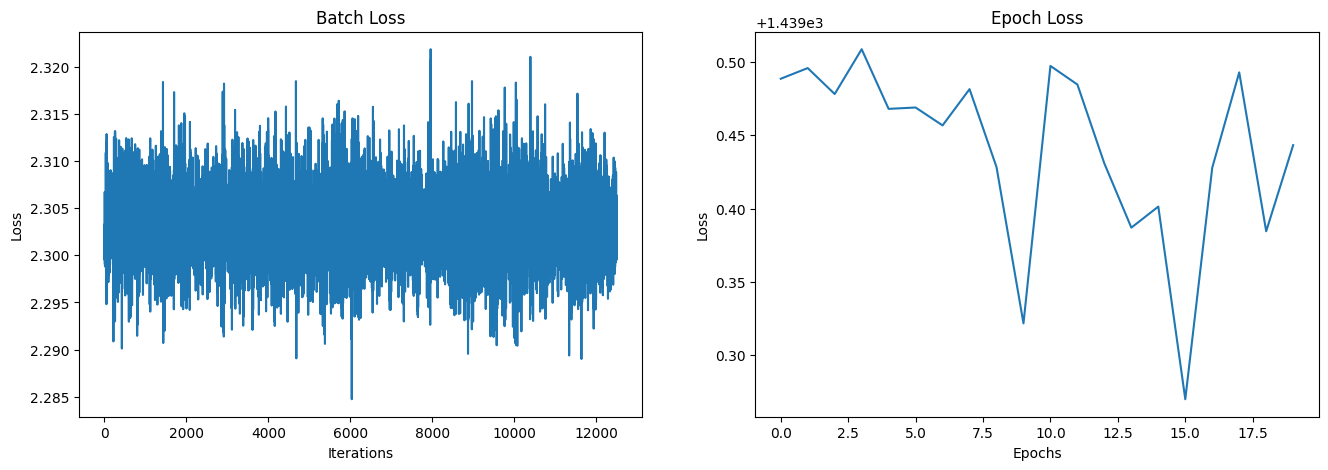

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(range(len(batch_loss_list)), (batch_loss_list), label='Batch Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[0].set_title('Batch Loss')

ax[1].plot(range(len(epoch_loss_list)), (epoch_loss_list), label='Epoch Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Epoch Loss')

In [26]:
predictions = []

for i, (images, labels) in enumerate(val_loader):
  images = images.to(device)
  labels = labels.to(device)
  with torch.no_grad():
  # Forward pass
    outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  predictions.append(predicted)

predictions = torch.cat(predictions, dim=0).to(torch.float64)

In [27]:
val_labels = []
for i, (images, labels) in enumerate(val_loader):
  val_labels.extend(labels.tolist())
actual_values = torch.tensor(val_labels, dtype=torch.float64).to(device)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_true = actual_values.detach().cpu().numpy()
y_pred = predictions.detach().cpu().numpy()

print("Accuracy Score:")
print(accuracy_score(y_true, y_pred))

print("Classification report:")
print(classification_report(y_true, y_pred))

Accuracy Score:
0.0973
Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1042
         1.0       0.11      0.00      0.01      1008
         2.0       0.10      0.10      0.10       977
         3.0       0.10      0.69      0.17       947
         4.0       0.00      0.00      0.00      1031
         5.0       0.11      0.09      0.10       987
         6.0       0.09      0.03      0.04       977
         7.0       0.09      0.10      0.09       966
         8.0       0.18      0.00      0.01      1014
         9.0       0.00      0.00      0.00      1051

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.05     10000
weighted avg       0.08      0.10      0.05     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
